# Análisis de Tipos de Revisiones

**Pregunta de Investigación MQ9:** ¿Qué tipo de revisiones se publican?

Este notebook analiza los diferentes tipos de trabajos de revisión (revisiones sistemáticas, mapeos, etc.) que se han publicado en el área de estudio.


In [1]:
# Configuración del entorno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")


In [2]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/mlproyecto/doctorado/main/MappingReview.csv"
df = pd.read_csv(url, sep=';', encoding='latin-1')

# Limpiar los nombres de las columnas para eliminar espacios en blanco
df.columns = df.columns.str.strip()

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"Columnas disponibles: {df.columns.tolist()}")


Dataset cargado: 89 filas y 8 columnas
Columnas disponibles: ['Title', 'Author(s)', 'Year', 'Publication Title', 'Type of Publication', 'Source', 'DOI', 'Abstract']


In [3]:
# Se buscará en los títulos y abstracts para identificar trabajos de revisión.

# Combinar Título y Abstract en una sola columna de texto para la búsqueda
df['full_text'] = (df['Title'].fillna('') + ' ' + df['Abstract'].fillna('')).str.lower()

# Función para clasificar el tipo de revisión basado en palabras clave específicas.
# El orden es importante para la especificidad (ej. 'systematic review' se debe comprobar antes que 'review').
def get_review_type(text):
    if 'systematic literature review' in text or 'slr' in text:
        return 'Systematic Literature Review'
    if 'systematic review' in text:
        return 'Systematic Review'
    if 'mapping review' in text:
        return 'Mapping Review'
    if 'scoping review' in text:
        return 'Scoping Review'
    if 'literature review' in text:
        return 'Literature Review'
    if 'review' in text:
        return 'Review (General)'
    return None

# Aplicar la función para crear una nueva columna con el tipo de revisión
df['review_type'] = df['full_text'].apply(get_review_type)

# Filtrar el DataFrame para mantener solo los trabajos de revisión identificados
review_papers = df.dropna(subset=['review_type']).copy()

print(f"Se han identificado {len(review_papers)} trabajos de revisión.")

# Contar la frecuencia de cada tipo de revisión
if not review_papers.empty:
    review_counts = review_papers['review_type'].value_counts()
    # Mostrar la tabla de resultados
    print("\nFrecuencia de cada tipo de revisión:")
    print(review_counts)
else:
    review_counts = pd.Series() # Crear una serie vacía para que el siguiente bloque no falle.
    print("\nNo se encontraron trabajos de revisión con las palabras clave especificadas.")


Se han identificado 7 trabajos de revisión.

Frecuencia de cada tipo de revisión:
review_type
Systematic Review               2
Review (General)                2
Systematic Literature Review    1
Scoping Review                  1
Literature Review               1
Name: count, dtype: int64


In [4]:
# Mostrar la tabla con los títulos de los trabajos de revisión y su tipo
if not review_papers.empty:
    print("\nTabla de trabajos de revisión identificados:")
    # Usamos display para una mejor visualización de la tabla en el notebook
    from IPython.display import display
    display(review_papers[['Title', 'review_type']])
else:
    print("\nNo se encontraron trabajos de revisión para mostrar en la tabla.")



Tabla de trabajos de revisión identificados:


,Title,review_type
0,What Would the Matrix Do?: A Systematic Review...,Systematic Review
4,Artificial Intelligence in Mathematics Educati...,Systematic Literature Review
50,Artificial Intelligence for Personalized Learn...,Scoping Review
58,A systematic review of the literature regardin...,Systematic Review
74,An Al-BERT-Bi-GRU-LDA algorithm for negative s...,Review (General)
82,Learn with M.E.-Let Us Boost Personalized Lear...,Literature Review
85,Artificial Intelligence for Enhancing Special ...,Review (General)


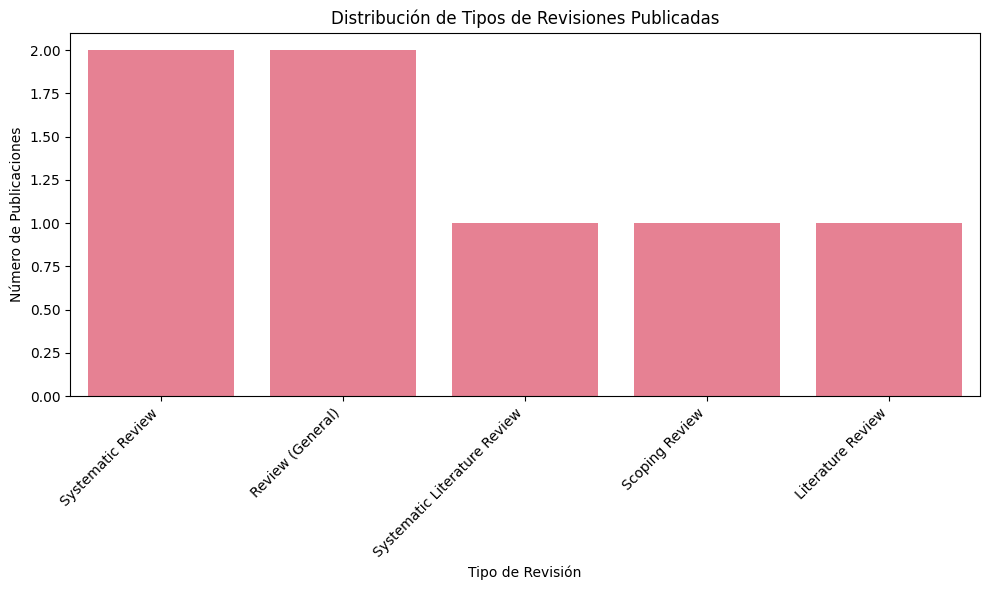

In [5]:
# Visualizar los resultados en un gráfico de barras
if not review_counts.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=review_counts.index, y=review_counts.values)
    plt.xlabel('Tipo de Revisión')
    plt.ylabel('Número de Publicaciones')
    plt.title('Distribución de Tipos de Revisiones Publicadas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo se encontraron datos de revisiones para visualizar.")


## Conclusiones para MQ9

*Tras analizar los títulos y resúmenes, se identificaron 7 trabajos de revisión, distribuidos de la siguiente manera:*

- **Systematic Review**: 2 trabajos.
- **Review (General)**: 2 trabajos.
- **Systematic Literature Review / SLR**: 1 trabajo.
- **Scoping Review**: 1 trabajo.
- **Literature Review**: 1 trabajo.


